<a href="https://colab.research.google.com/github/JuliaVazTostes/curso_data_science/blob/master/M%C3%B3dulo_4_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

*Decision Tree*, ou Árvore de Decisão em português, é um algoritmo de aprendizado supervisionado para *Machine Learning*, e pode ser usado tanto para classificação quanto para regressão.

Uma *Decision Tree* é construída a partir de um processo de indução, que vai dividindo os dados em subconjuntos cada vez mais puros. Para selecionar os atributos que irão compor a árvore, são considerados o grau de entropia de um nó e a informação ganha a mais após um *split*.

<p align=center>
  <img src="http://sigmoidal.ai/wp-content/uploads/2019/10/Screen-Shot-2019-10-07-at-15.30.28-1.png" width="50%">
</p>

Acima, está representada a árvore construída para o nosso problema de Doenças Cardiovasculares. Repare como a classificação de um paciente vai seguindo um caminho baseado nos valores individuais de cada atributo que faz parte da *decision tree*. [Dê uma olhada neste site](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/). O R2D3 é um site muito bom para aprender visualmente como uma árvore é construída.

## Decision Tree no `scikit-learn`

O conjunto de dados que usaremos neste *notebook* foi adapatado do *dataset* original da ***Cleveland Clinic Foundation*** e pode ser baixado no [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease). O *link* para a versão já tratada do *dataset*, e que usaremos agora, está disponível para download [neste link](http://dl.dropboxusercontent.com/s/6d91j46mkcdj4qv/heart-disease-clean.csv?dl=0).

Vamos importar as bibliotecas necessárias e o conjunto de dados para um *DataFrame*. Na sequência, vamos dar uma olhada nas primeiras entradas desse *dataset*.



In [0]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# configurar o notebook
sns.set_style()

# importar o arquivo
df = pd.read_csv("http://dl.dropboxusercontent.com/s/6d91j46mkcdj4qv/heart-disease-clean.csv?dl=0")

# ver as primeiras entradas
print("Tamanho de df: {}\n".format(df.shape))

df.head(10)

Tamanho de df: (303, 14)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


Vamos importar a classe `DecisionTreeClassifier` a partir do `sklearn.tree`, assim como a métrica que será usadas para avaliar o desempenho do modelo de *Machine Learning*.

In [0]:
# importar scikit-learn para criar o modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Agora, vamos dividir o *dataset* entre treino e teste, instanciar um objetivo `DecisionTreeClassifier` e treinar um modelo com profundidade máxima=4 e especificar o critério de entropia.

In [0]:
# determinar X e y
X = df.drop('num', axis=1)
y = df['num']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# criar e treinar um modelo de Regressão Linear
dt_model = DecisionTreeClassifier(max_depth=6, criterion="entropy")
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Vamos testar o desempenho do modelo em cima do nosso conjunto de testes. Para isso, vou colocar a variável `X_test` como argumento do `ml_model.predict()` e guardar as previsões para verificar o desempenho do modelo.

In [0]:
# previsões e probabilidades em cima do dataset de teste
y_pred = dt_model.predict(X_test)

# ver performance do algoritmo
print("\nAccuracy Score:")
print (accuracy_score(y_test, y_pred))


Accuracy Score:
0.7894736842105263


É possível também visualizar como ficou a nossa árvore, criando um dot e desenhando ele usando as bibliotecas abaixo.

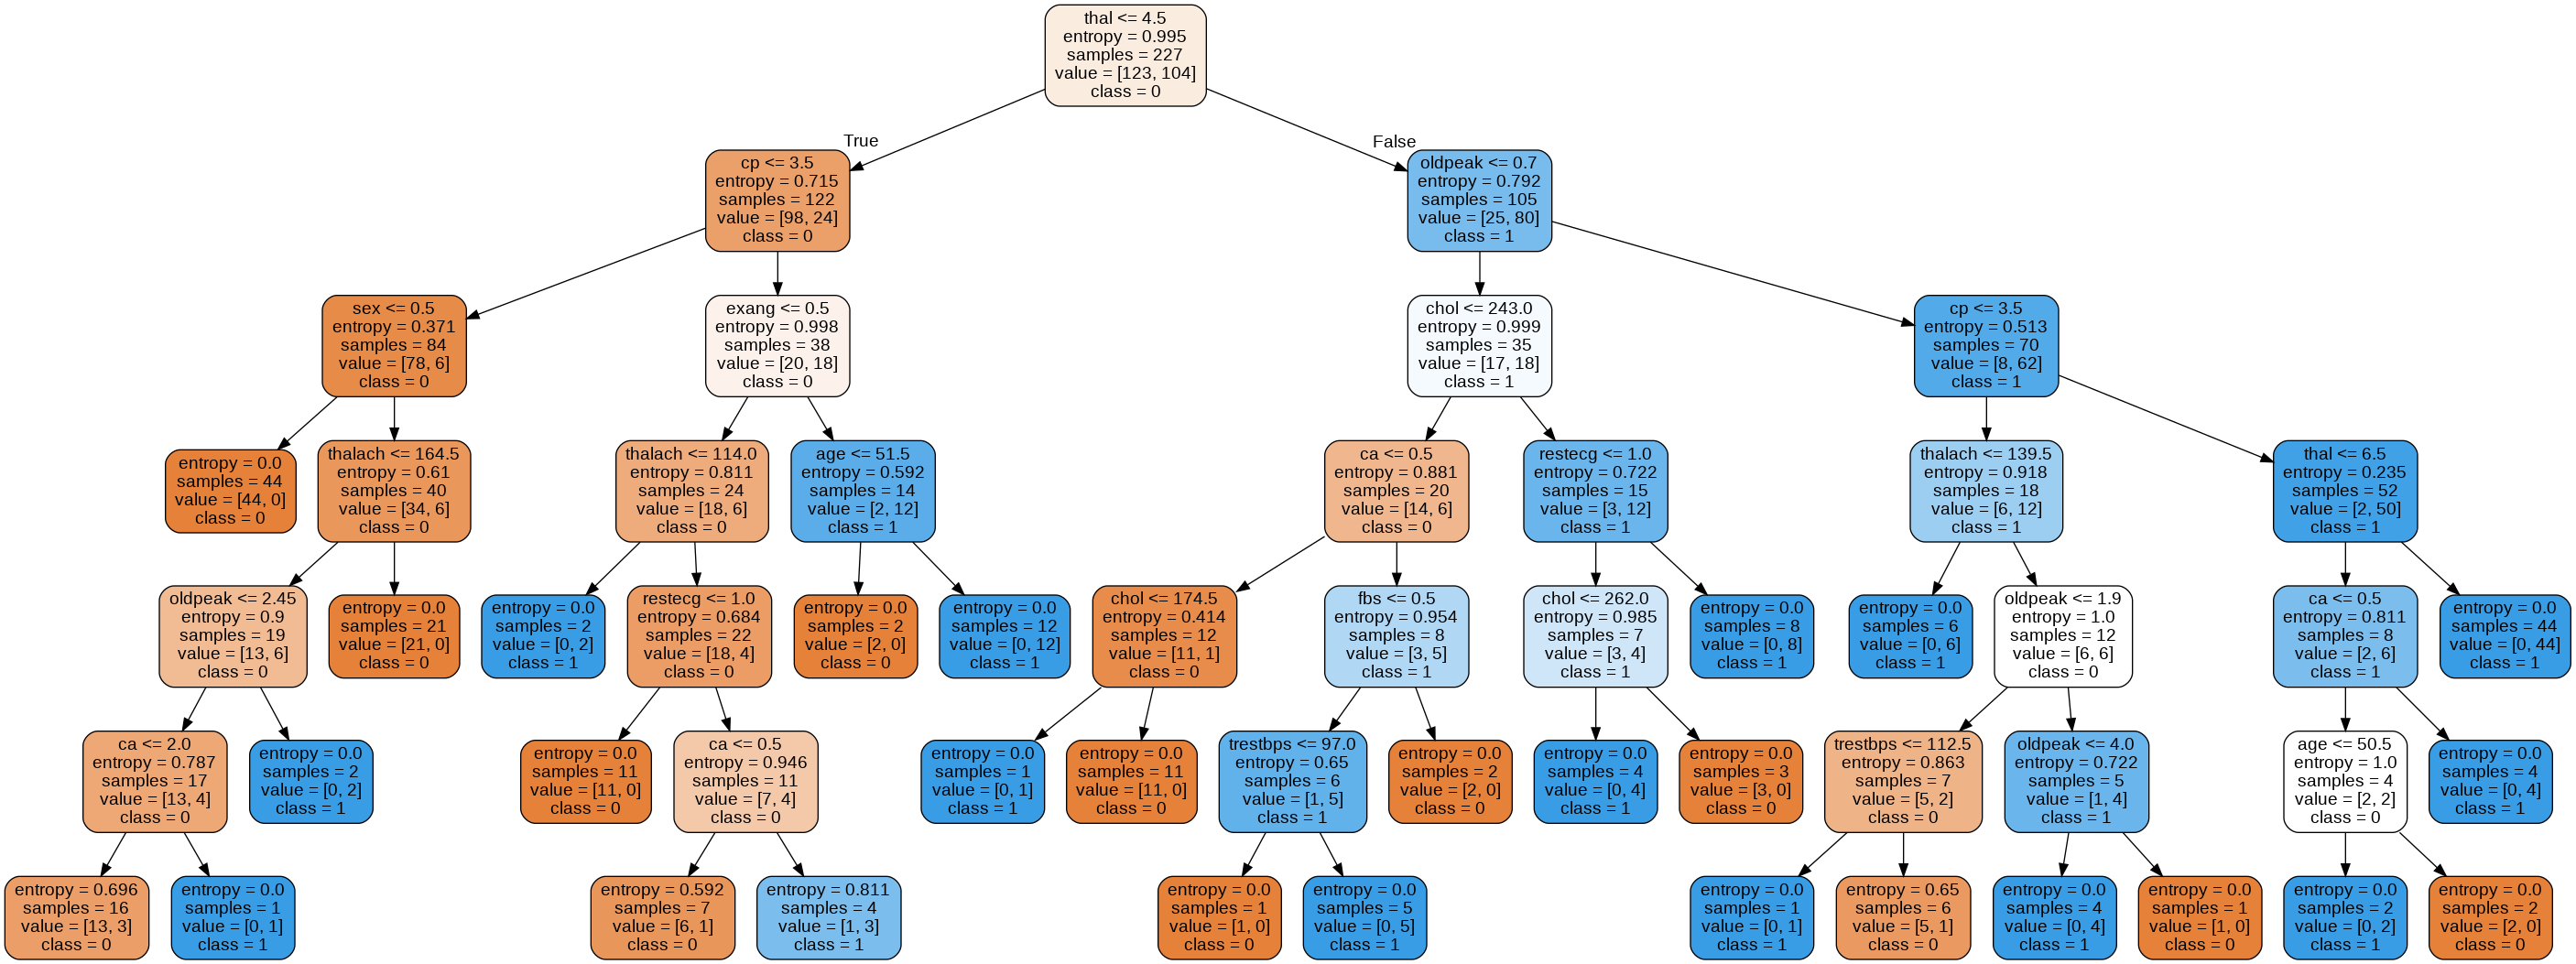

In [0]:
# importar bibliotecas
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# criar DOT 
dot = export_graphviz(dt_model, filled=True, rounded=True,
                      feature_names=X.columns, class_names=['0', '1'])

# plotar
graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())